# Latar Belakang Tugas
Sebagai tugas akhir yang akan menuntaskan perjalanan mu menjalani magang virtual pada Kalbe Nutritionals, kamu akan mengembangkan model data prediktif untuk meningkatkan bisnis perusahaan seperti mengoptimalkan strategi kompetitif bisnis atau membuat analisa regresi dan clustering (dengan data yang tersedia), lalu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Perhatikan panduan pengerjaan dan arahan yang diberikan yaa. Selamat mengerjakan final project!

# Load Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

In [2]:
df_customer = pd.read_csv('Case Study - Customer.csv', sep=';')
df_prod = pd.read_csv('Case Study - Product.csv', sep=';')
df_str = pd.read_csv('Case Study - Store.csv', sep=';')
df_tr = pd.read_csv('Case Study - Transaction.csv', sep=';')

# Data Cleansing

In [3]:
# convert Date to datetime
df_tr['Date'] = pd.to_datetime(df_tr['Date'], format='%d/%m/%Y')

## Cek Missing Values

In [4]:
print("Null Counts in df_customer:")
print(df_customer.isnull().sum())

print("\nNull Counts in df_prod:")
print(df_prod.isnull().sum())

print("\nNull Counts in df_str:")
print(df_str.isnull().sum())

print("\nNull Counts in df_tr:")
print(df_tr.isnull().sum())

Null Counts in df_customer:
CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

Null Counts in df_prod:
ProductID       0
Product Name    0
Price           0
dtype: int64

Null Counts in df_str:
StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Null Counts in df_tr:
TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


## Cek Duplikat

In [5]:
print("nDuplicate Counts in df_customer:")
print(df_customer.duplicated().any())

print("\nDuplicate Counts in df_prod:")
print(df_prod.duplicated().any())

print("\nDuplicate Counts in df_str:")
print(df_str.duplicated().any())

print("\nDuplicate Counts in df_tr:")
print(df_tr.duplicated().any())

nDuplicate Counts in df_customer:
False

Duplicate Counts in df_prod:
False

Duplicate Counts in df_str:
False

Duplicate Counts in df_tr:
False


## Merge data

In [6]:
df_merge = pd.merge(df_tr, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_prod.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_str, on=['StoreID'])

In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   object        
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [8]:
df_merge.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
1269,TR7808,132,2022-04-02,P7,9400,2,18800,1,41,0,Married,"17,69",Coffee Candy,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
4395,TR95050,446,2022-08-24,P5,4200,4,16800,11,57,0,Married,"7,81",Thai Tea,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
1494,TR96549,96,2022-05-14,P8,16000,2,32000,7,55,0,Married,"13,67",Oat,Buana Indah,Buana,General Trade,"3,316694","114,590111"
2886,TR4401,342,2022-01-12,P4,12000,5,60000,3,48,1,Married,"13,55",Potato Chip,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
1390,TR14050,431,2022-07-11,P10,15000,3,45000,1,40,1,Married,"9,51",Cheese Stick,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"


# Regresi

In [9]:
df_regresi = df_merge.groupby(['Date']).agg({'Qty':'sum'}).reset_index()
df_regresi['Date'] = pd.to_datetime(df_regresi['Date'], format='%d/%m/%Y')
df_regresi.sort_values(by='Date', inplace=True)
df_regresi.set_index('Date', inplace=True)
df_regresi.head()

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


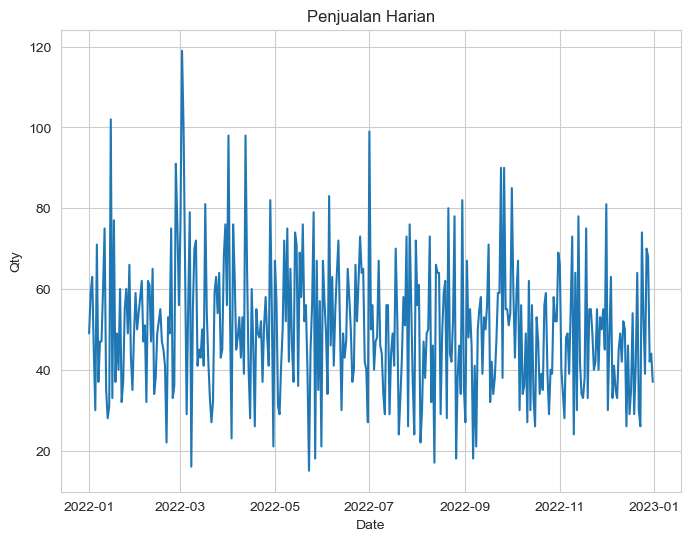

In [10]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.lineplot(data=df_regresi, x='Date', y='Qty', legend=False)
plt.title('Penjualan Harian')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

# Machine Learning model ARIMA

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_regresi, test_size=0.2, shuffle=False)
print(train.shape, test.shape)

(292, 1) (73, 1)


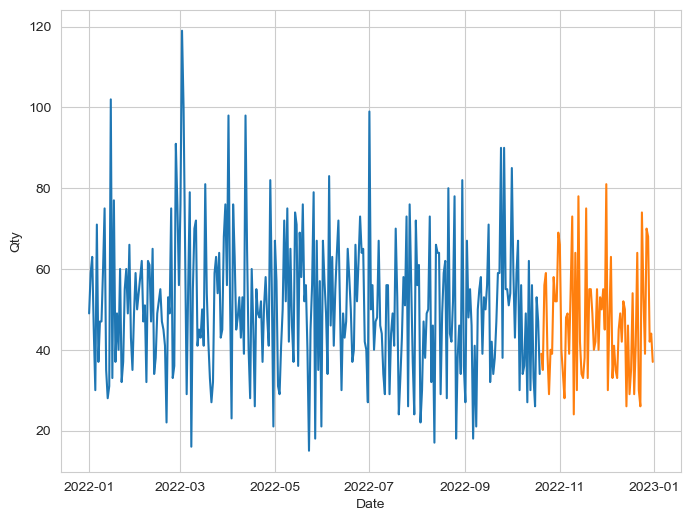

In [13]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.lineplot(data=train, x=train.index, y=train['Qty'])
sns.lineplot(data=test, x=test.index, y=test['Qty'])
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Menentukan nilai p,q dan d
p = 2
q = 2
d = 2

# Membuat Model ARIMA dengan Parameter yang telah ditentukan
model = ARIMA(train, order=(p,q,d))

# Melatih Model dengan menggunakan data test
model_fit = model.fit()
start_x = len(train)
end_x =len(train) + len(test) - 1
predictions  = model_fit.predict(start=start_x, end=end_x, dynamic=False)

C:\Users\limat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\limat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\limat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\limat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
# Evaluasi ke-1
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 286.80988202957997


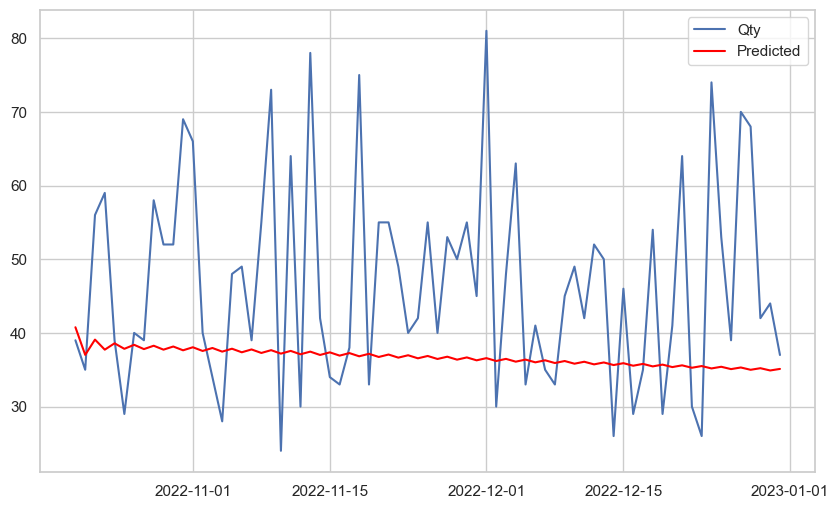

In [24]:
plt.figure(figsize=(10,6))
plt.plot(test, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
sns.set(style="whitegrid")
plt.grid(True)
plt.show()

# Machine Learning Model Clustering

In [27]:
aggregated = df_merge.groupby('CustomerID').agg({'TransactionID':'count',
                                                'Qty':'sum',
                                                'TotalAmount':'sum'}).reset_index()
aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [30]:
# Melakukan Clustering Menggunakan K-Means

X = aggregated[['TransactionID','Qty','TotalAmount']]

In [45]:
n_clusters = 4

from sklearn.cluster import KMeans

# Membuat Model kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# melakukan clustering pada data
aggregated['cluster'] = kmeans.fit_predict(X)

C:\Users\limat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


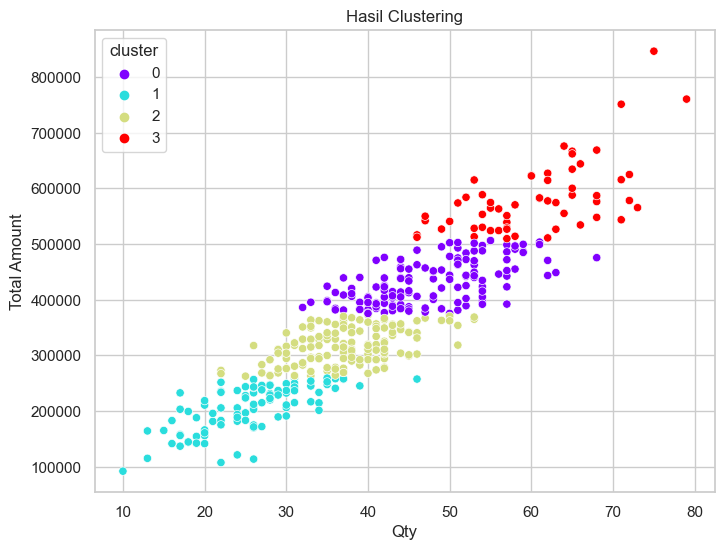

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aggregated, x='Qty', y='TotalAmount', hue='cluster', palette='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Hasil Clustering')
plt.show()

In [73]:
wcss = []
for n in range(1,11):
    model_1 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=100, tol=0.0001, random_state=100)
    model_1.fit(X)
    wcss.append(model_1.inertia_)
print(wcss)

[6928031859602.738, 2434662706463.3955, 1233033389389.9624, 776512017046.2605, 504081360603.5857, 382593519595.5847, 277766901361.2123, 212941531954.89276, 171724378723.10638, 136882282484.87318]


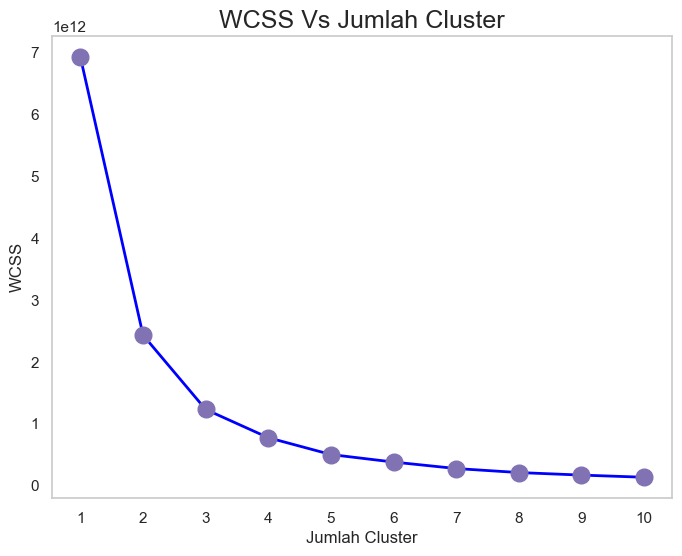

In [75]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,11)), wcss, color='blue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS Vs Jumlah Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [49]:
# mengevaluasi seberapa compact data dalam sebuah klaster terhadap pusat klaster masing-masing
model_1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model_1.fit(X)
label_1 = model_1.labels_
centroids_1=  model_1.cluster_centers_

In [56]:
aggregated['cluster'] = model_1.labels_
aggregated.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,3
4,5,7,27,268600,3


<Figure size 800x600 with 0 Axes>

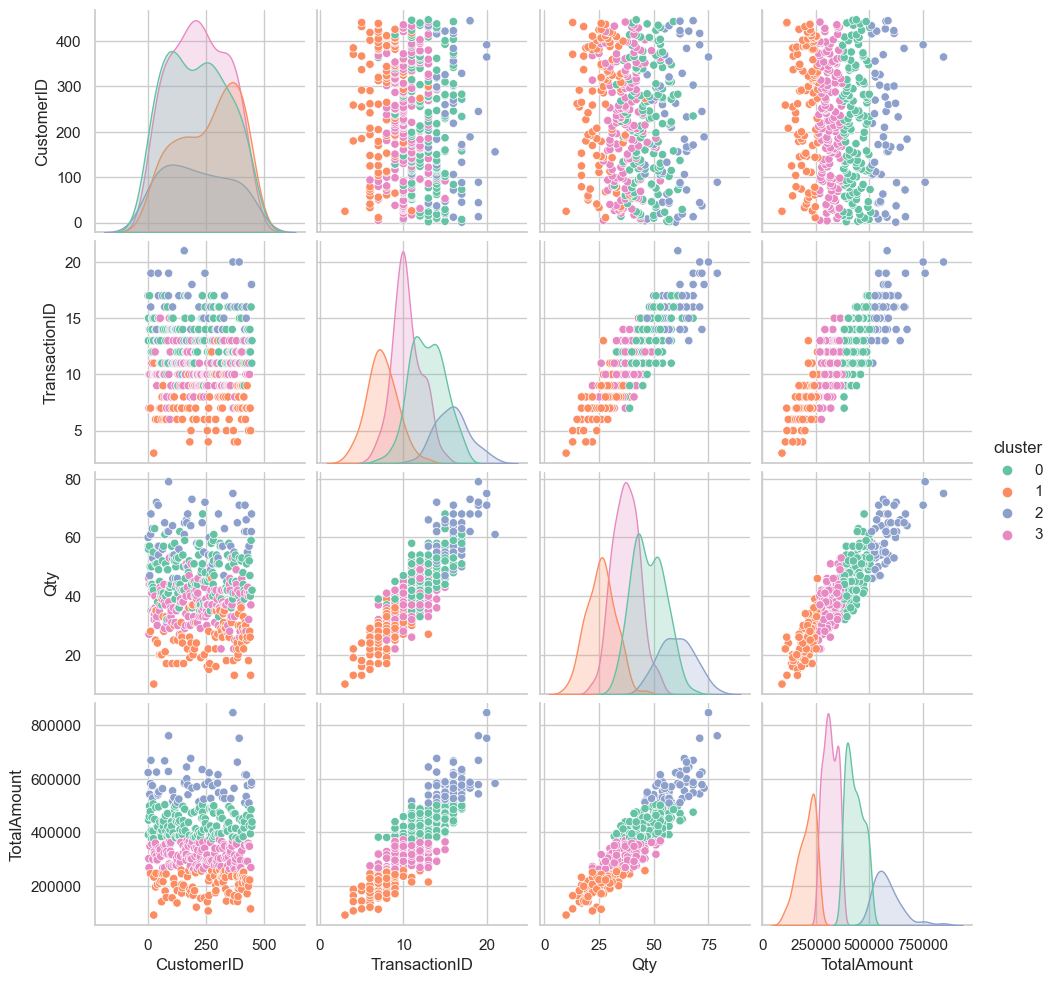

In [67]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.pairplot(data=aggregated, hue='cluster', palette='Set2')
plt.show()

In [69]:
df_cluster_mean = aggregated.groupby('cluster').agg({'CustomerID':'count',
                                                    'TransactionID':'mean',
                                                    'Qty':'mean',
                                                    'TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending=False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
3,152,10.414474,37.263158,316792.763158
0,140,12.871429,47.521429,431575.000000
1,98,7.448980,25.867347,206380.612245
2,57,15.877193,60.421053,583240.350877


# Kesimpulan

## Regresi
- Cluster 1
Cluster dengan jumlah pelanggan terbanyak
Karakteristik dari cluster ini adalah cluster menempati posisi ketiga dari setiap metrik (transaction, quantity, total amount)
- Rekomendasi
Membangun hubungan baik dengan pelanggan dan Melakukan survey untuk mengembangkan minat pelanggan terbanyak


- Cluster 2
Karakteristik dari cluster ini adalah cluster menempati posisi tertinggi kedua dari setiap metrik (transaction, quantity, total amount)
- Rekomendasi
Memberikan promo secara rutin untuk meningkatkan transaksi dan Melakukan peningkatan penjualan produk dengan harga tinggi

## Clustering

- Cluster 1: 
Karakteristik pelanggan dengan nilai terendah dari setiap metrik (transaction, quantity, total amount)
- Rekomendasi: Rekomendasi
Memberikan diskon yang signifikan untuk meningkatkan transaksi, Memberikan promo pada transaksi dengan jumlah barang yang lebih tinggi, dan Melakukan survey untuk mengidentifikasi potensi pengembangan produk

- Cluster 2: 
Cluster dengan jumlah paling sedikit dan Karakteristik dari cluster ini adalah cluster menempati posisi tertinggi dari setiap metrik (transaction, quantity, total amount)
- rekomendasi:
Menawarkan promo program loyalitas untuk mempertahankan transaksi, Melakukan survey kepuasaan pelanggan, dan Mendorong peningkatan penjualan produk dengan harga yang lebih tinggi